# **PERDIDOS EN EL ESPACIO**

Este proyecto consiste en localizar el planeta en el que se encuentra la nave.

## Importaciones necesarias

Primeramente, comenzamos con la importación de las distintas librerías necesarias para la realización del ejercicio. Las librerías importadas son las siguientes:</br>
- Panda: Librería dedicada a la manipulación y análisis de datos.</br>
- Numpy: Librería dedicada a funciones matemáticas, también estadísticas siendo fundamentales para la resolución del ejercicio.</br>
- Matplotlib: Librería capaz de realizar gráficos, diagramas, entre otros, es decir, es una biblioteca de visualización de datos. Para poder funcionar correctamente es necesario Numpy ya que lo utiliza para realizar distintos cálculos antes de realizar el grafico que se imprimirá. Se importa junto al módulo pyplot, que proporciona una interfaz simple para la creación y visualización de gráficos y datos.</br>
- Plotly: Librería similar a Matplotlib, cumple la misma función. Sin embargo, estos gráficos que crean son interactivos. Se importa dentro de ella express, añadiendo la posibilidad de crear gráficos de área, puntos, entre otros, necesarios para la realización de las rectas de regresión lineal.</br>

In [114]:
# Importación de las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
print("Setup complete")

Setup complete


## Primera toma de contacto con los planetas

### Creación de los planetas

Los planetas tienen características similares, mismas variables, pero con distintos datos. Por ello, sería óptimo la creación de clases poniendo como variable la gravedad y nombre de cada uno de ellos. Para la definición de los planetas, se ha realizado un diccionario introduciendo como clave el nombre del planeta y valor su gravedad. Finalmente mediante un bucle se han introducido en una lista todos los planetas. </br>

In [115]:
class Planeta:
    def __init__(self, nombre, g):
        self.nombre = nombre
        self.g = g

planetas = {'Tierra': 9.8 , 'Marte': 3.7, 'Jupiter': 24.8, 'Saturno': 9.0, 'Urano': 8.7, 'Neptuno': 11.0} # Posibles planetas
planetas_list = [] # Planetas

for i in range(len(planetas)):
    planetas[i] = Planeta(list(planetas.keys())[i], list(planetas.values())[i])
    planetas_list.append(planetas[i])


print("Planetas cargados")

Planetas cargados


Con los planetas ya generados se pasaría a la fase de la experimentación y a través de los ejercicios propuestos se descartarían algunos planetas. Aunque primero definimos las operaciones que se utilizarán para el cálculo del error y la gravedad mediante funciones.</br>

### Operaciones y búsqueda del planeta

#### Cálculo de la gravedad y el error

El enunciado proporciona la fórmula necesaria y además especifica el error de la longitud y tiempo.</br>

In [116]:
# Operación de la simulación
def simulacion(longitud, tiempo):
    # CALCULO DE LA GRAVEDAD
    g_calculado = (2 * longitud) / (tiempo**2)

    # CALCULO DEL ERROR
    L_error = 0.01 # VALOR YA DADO EN EL ENUNCIADO
    t_error = 0.01 # VALOR YA DADO EN EL ENUNCIADO
    dg_dL = 2 / tiempo**2 #Derivada parcial g respecto l
    dg_dt = -4 * longitud / tiempo**3 #Derivada parcial g respecto t

    g_error = np.sqrt((dg_dL * L_error)**2 + (dg_dt * t_error)**2)
    return g_calculado, g_error

Definida las distintas operaciones para el cálculo de la gravedad y el error. Nos hace falta designar una función que permita mediante ese resultado analizar en que planetas estará y descartar algunos. Para ello, se establece una función que devuelve una lista tratada con un bucle que mediante un condicional certifique si el valor de las gravedades de todos los planetas se encuentra entre la nueva gravedad calculada mas y menos su error. </br>

#### Establecimiento de los posibles planetas

In [117]:

def planetas_esperados(g_calculado, g_error):
    planetas_probables = []
    for i in range(len(planetas_list)):
        if g_calculado - g_error <= planetas_list[i].g <= g_calculado + g_error:
            planetas_probables.append(planetas[i])
        else:
            pass
    return planetas_probables


## Resolución de los ejercicios propuestos

In [118]:
experimento_a = simulacion(1, 0.46)
print("Experimento A")
print(f"- Gravedad calculada: {round(experimento_a[0],3)} \n- Error calculado: {round(experimento_a[1],3)} ")
experimento_b = simulacion(2, 0.66)
print('Experimento B')
print(f"- Gravedad calculada: {round(experimento_b[0],3)} \n- Error calculado: {round(experimento_b[1],3)} ")

Experimento A
- Gravedad calculada: 9.452 
- Error calculado: 0.422 
Experimento B
- Gravedad calculada: 9.183 
- Error calculado: 0.282 


In [119]:
experimento_a = planetas_esperados(experimento_a[0], experimento_a[1])

experimento_b = planetas_esperados(experimento_b[0], experimento_b[1])

if experimento_a == experimento_b:
    print("El planeta en el que se encuentra la nave se trata de ", experimento_a[0].nombre())
else:
    planetas_probables = []
    for i in range(len(experimento_a)):
        planetas_probables.append(experimento_a[i])
    for i in range(len(experimento_b)):
        planetas_probables.append(experimento_b[i])
    print("El planeta se puede encontrar en alguno de los siguientes planetas: ")
    for i in range(len(planetas_probables)):
        print('  -', planetas_probables[i].nombre)

El planeta se puede encontrar en alguno de los siguientes planetas: 
  - Tierra
  - Saturno


A continuación, la lista se nos ha reducido a 2 posibles planetas por lo tanto comencemos dataset.

## Creación del DataSet

El objetivo será realizar un dataset con distintos valores de longitud y tiempo y a partir de ahí calcular su error y gravedad a través de la anterior función. Tras ello, ejecutar el método anterior para averiguar en todos los posibles planetas y decidir finalmente en cual estará.</br>

### Creacion de distintos instantes de tiempo y longitudes

Se ha realizado una gráfica, SE HA SUPUESTO que la gravedad es lineal, no cuadrática que es como sería en la realidad. Para ello, se ha creado un DataFrame con los valores dados por los problemas propuestos. Mediante el uso de numpy, se ha hallado los distintos coeficientes de la recta: y=mx+n. Tras ello mediante plotly se ha creado primero la gráfica con eje x: tiempo; eje y= longitud. Mediante la función add_trace se añade la recta.</br>

In [120]:
df_recta = pd.DataFrame({'tiempo': [0.46, 0.66], 'longitud': [1,2]})
coeficientes = np.polyfit(df_recta['tiempo'], df_recta['longitud'], 1) # polyfit(x, y, degree) sirve para calcular los coeficientes de la ecuación de la recta (y = mx + b)
m = coeficientes[0]
n = coeficientes[1]
fig = px.scatter(df_recta, x='tiempo', y='longitud') # Crear una gráfica de dispersión
fig.add_trace(px.line(x=df_recta['tiempo'], y=m*df_recta['tiempo'] + n).data[0]) # Añadir la recta a la gráfica de dispersión
fig.show()

Esta gráfica ha sido realizada para no coger datos atípicos como podría ser: L = 30; t = 0'3. A continuación, se seleccionarán algunos de los infinitos puntos que contiene la recta y se obtendrán valores para la longitud y tiempo.</br>

Para poder realizar lo anteriormente mencionado, mediante la opción de linspace de numpy, estableciendo el principio, el tope y el número de puntos que quieres obtener, se generan valores equidistantes entre el principio y el tope. Para calcular la y, se escribe la ecuación de la recta. Mediante un bucle se van añadiendo esos valores a una lista que serán añadidos al dataframe creado y redondeados a la milésima.</br>

In [121]:
# PENDIENTE
m =(df_recta['longitud'][1] - df_recta['longitud'][0] )/ (df_recta['tiempo'][1] - df_recta['tiempo'][0])
print(m)

# ORDENADA EN EL ORIGEN
n = df_recta['longitud'][0] - m * df_recta['tiempo'][0]

# CALCULO DE TIEMPOS/LONGITUDES
x = np.linspace(0.46, 0.66, 100)
y = m*x + n

data = []
for i in range(len(x)):
    data.append({'tiempo': x[i], 'longitud': y[i]})


df_recta = pd.DataFrame(data)
df_recta = df_recta.round(3)
df_recta.head(3)

5.0


,tiempo,longitud
0,0.460,1.00
1,0.462,1.01
2,0.464,1.02


Recalcamos que todos los valores de las columnas deben de ser tipo float, debido a que se tratan de números decimales.</br>

In [122]:
df_recta.astype(float)
df_recta.dtypes

tiempo      float64
longitud    float64
dtype: object

**COMPROBACIÓN PUNTOS HALLADOS EN LA RECTA DE MANERA GRÁFICA**

En este caso, se realizará una gráfica con todos los datos del dataframe y serán colocado en el gráfico anterior para comprobar que son puntos de la recta. En este caso, usaremos la libreria Matplotlib.

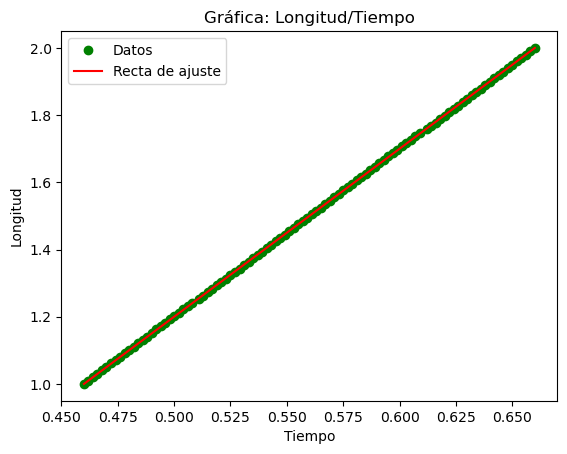

In [123]:

# CREACIÓN DE LA GRÁFICA
plt.plot(df_recta['tiempo'], df_recta['longitud'], 'o', label='Datos', color = 'green') # plot(x, y, format): format siendo el color y el tipo de línea

# CREACIÓN DE LA RECTA
plt.plot(df_recta['tiempo'], m * df_recta['tiempo'] + n, '-', label='Recta de ajuste', color='red')

# REALIZACIÓN DE LOS COMPLEMENTOS DE LA GRÁFICA: Título, nombres de los ejes y leyenda
plt.title('Gráfica: Longitud/Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Longitud')
plt.legend()


plt.show()

### Cálculo de la gravedad y el error

Con los tiempos y longitudes ya podemos empezar a determinar el error y la gravedad. Para ello, crearemos dos listas en las cuales mediante un bucle se irán añadiendo los cálculos del error y gravedad a sus correspondientes listas. Tras ello, serán añadidas al dataframe creado anteriormente. </br>

In [124]:
g_calculado = []
g_error = []
for i in range(len(df_recta)):
    g = simulacion(df_recta['longitud'][i], df_recta['tiempo'][i])
    g_calculado.append(g[0])
    g_error.append(g[1])
df_recta['g_calculado'] = g_calculado
df_recta['g_error'] = g_error

In [125]:
df_recta.head(5)

,tiempo,longitud,g_calculado,g_error
0,0.460,1.00,9.451796,0.421677
1,0.462,1.01,9.463841,0.420269
2,0.464,1.02,9.475327,0.418851
3,0.466,1.03,9.486268,0.417423
4,0.468,1.04,9.496676,0.415987


In [126]:
df_recta.to_csv('data/data_no_faker.csv') # CREACIÓN DE UN CSV

### Posible planeta

Tras todo lo realizado, ya se han obtenido todos los datos necesarios para calcular la gravedad y poder finalmente usar la función 'planetas_esperado' para obtener el planeta. Pero antes de eso, se realizará una copia del dataframe anterior para no modificarlo.</br>

In [127]:
df_recta_1 = df_recta.copy()

In [128]:
planeta_pos = []
for i in range(100):
    planeta = planetas_esperados(df_recta_1['g_calculado'][i], df_recta_1['g_error'][i])
    if len(planeta) >= 1:
        for i in range(len(planeta)):
            planeta = planeta[i].nombre
    else:
        planeta = 'No se encontró planeta'
    planeta_pos.append(planeta)

df_recta_1['planeta'] = planeta_pos
df_recta_1['planeta'].astype(str)

0      Tierra
1      Tierra
2      Tierra
3      Tierra
4      Tierra
       ...   
95    Saturno
96    Saturno
97    Saturno
98    Saturno
99    Saturno
Name: planeta, Length: 100, dtype: object

In [129]:
df_recta_1.head(100)

,tiempo,longitud,g_calculado,g_error,planeta
0,0.460,1.00,9.451796,0.421677,Tierra
1,0.462,1.01,9.463841,0.420269,Tierra
2,0.464,1.02,9.475327,0.418851,Tierra
3,0.466,1.03,9.486268,0.417423,Tierra
4,0.468,1.04,9.496676,0.415987,Tierra
...,...,...,...,...,...
95,0.652,1.96,9.221273,0.286747,Saturno
96,0.654,1.97,9.211720,0.285558,Saturno
97,0.656,1.98,9.202112,0.284376,Saturno
98,0.658,1.99,9.192450,0.283199,Saturno


In [130]:
df_recta_1['planeta'] = df_recta_1['planeta'].replace('[]', None)

In [131]:
df_recta_1['planeta'].notnull()

0     True
1     True
2     True
3     True
4     True
      ... 
95    True
96    True
97    True
98    True
99    True
Name: planeta, Length: 100, dtype: bool

In [132]:
df_recta_1.dtypes

tiempo         float64
longitud       float64
g_calculado    float64
g_error        float64
planeta         object
dtype: object

In [133]:
df_recta_1['planeta'].value_counts()


Tierra                    67
No se encontró planeta    20
Saturno                   13
Name: planeta, dtype: int64

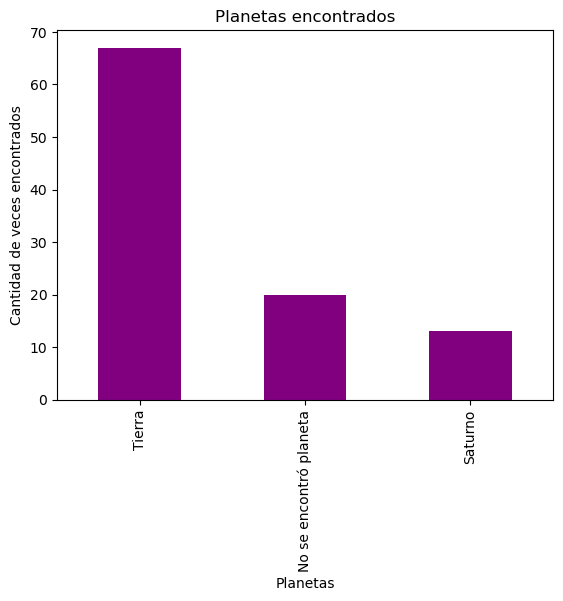

In [144]:
df_recta_1['planeta'].value_counts().plot(kind='bar', color='purple')

plt.title('Planetas encontrados')
plt.xlabel('Planetas')
plt.ylabel('Cantidad de veces encontrados')

plt.show()

## Conclusión